In [1]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass.csv


In [2]:
import pandas as pd
data = pd.read_csv('glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7



1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Data types of columns
print(data.dtypes)

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    

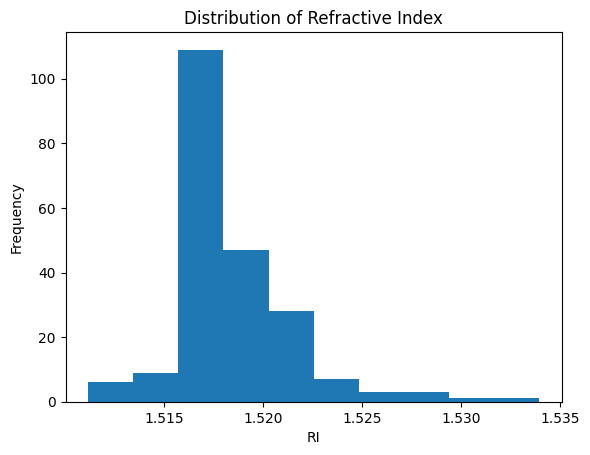

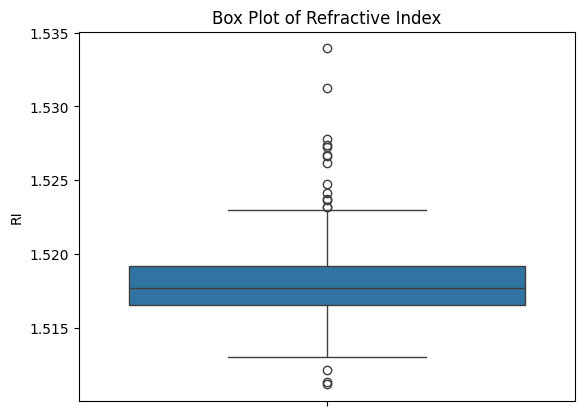

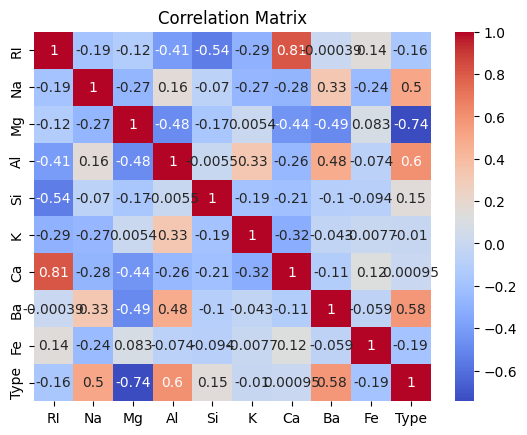

In [4]:
# Example: Histogram of 'RI' (Refractive Index)
plt.hist(data['RI'], bins=10)
plt.xlabel('RI')
plt.ylabel('Frequency')
plt.title('Distribution of Refractive Index')
plt.show()

# Box plots to identify outliers
sns.boxplot(data['RI'])
plt.title('Box Plot of Refractive Index')
plt.show()

# Correlation matrix to understand relationships between features
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

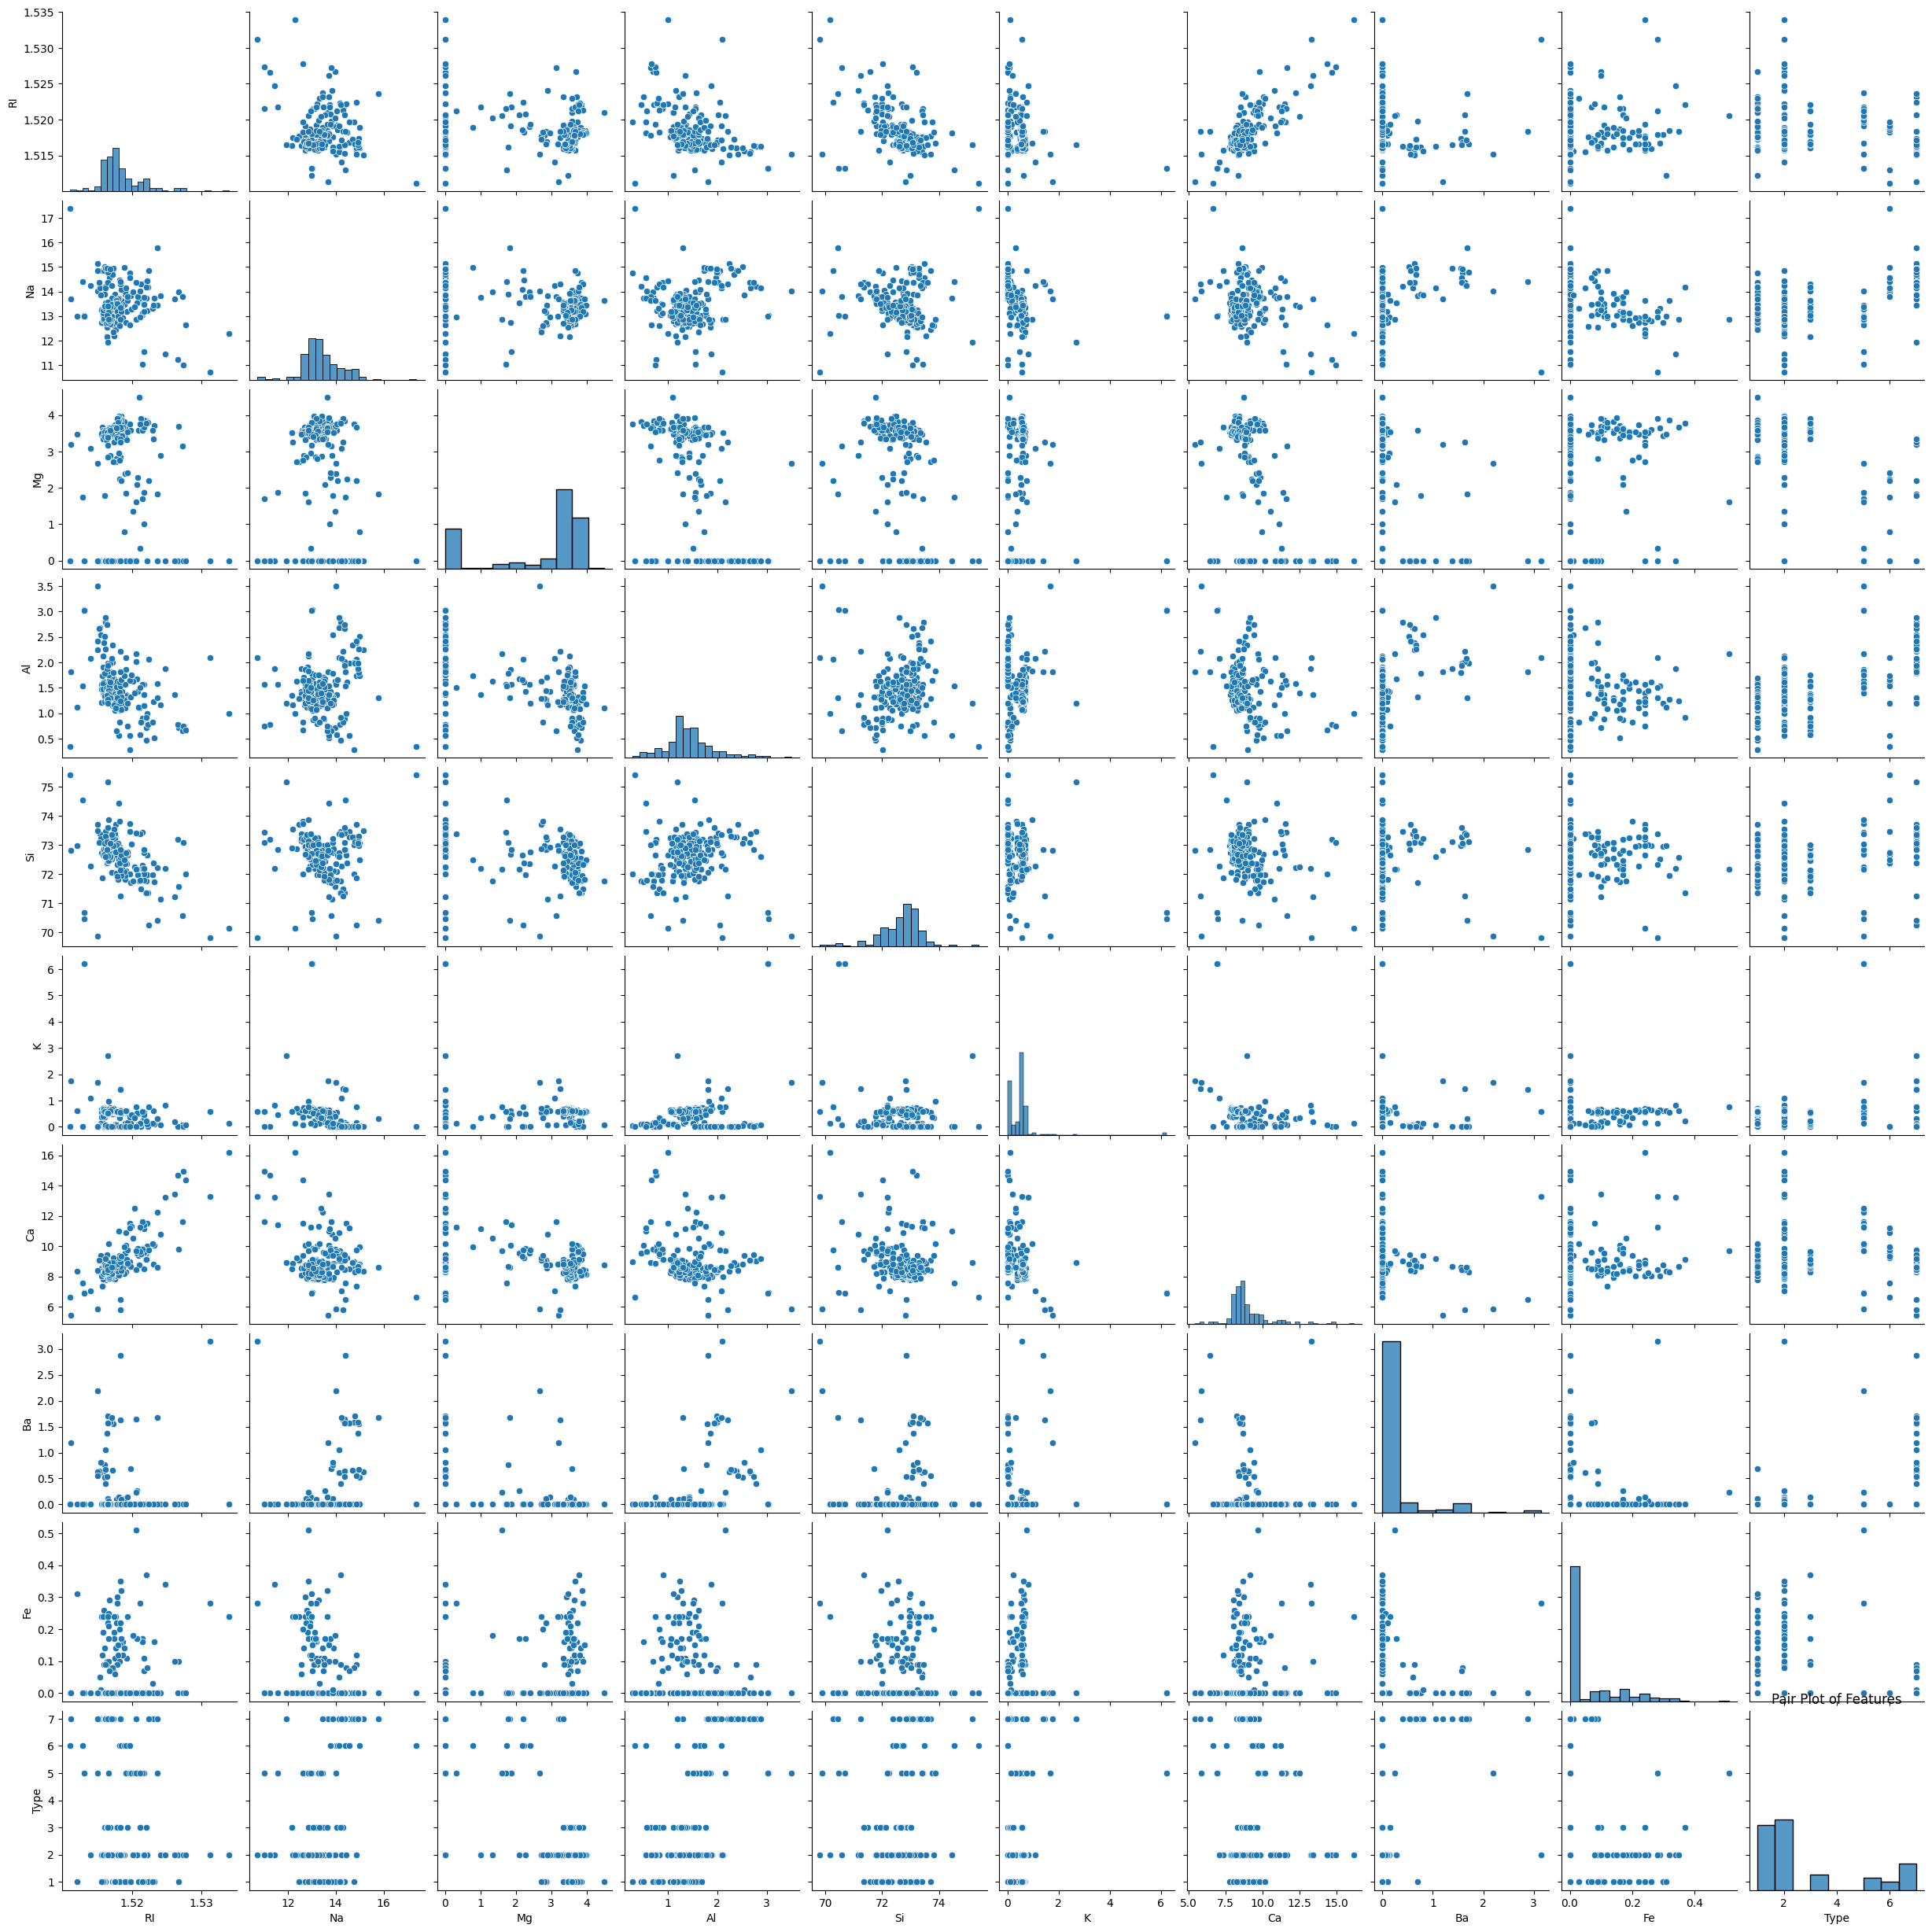

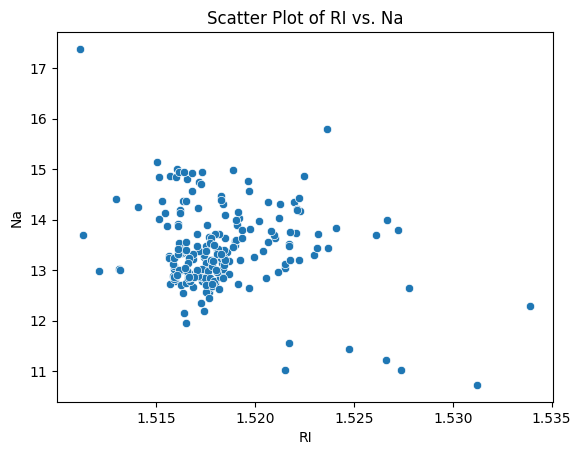

In [5]:
# Pair plot to visualize relationships between multiple features
sns.pairplot(data)
plt.title('Pair Plot of Features')
plt.show()

# we can also create specific pair plots for selected features
# For example, to visualize the relationship between 'RI' and 'Na':
sns.scatterplot(x='RI', y='Na', data=data)
plt.title('Scatter Plot of RI vs. Na')
plt.show()


In [6]:
# Analyze patterns and correlations:
# - Look for strong positive or negative correlations in the correlation matrix and heatmap.
# - Observe the distribution of each feature in the histograms and box plots.
# - Identify any potential outliers that may need further investigation.
# - Explore relationships between features in the scatter plots and pair plots.


3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

In [7]:
# 1. Check for missing values in the dataset and decide on a strategy for handling them.

# Check for missing values again (although we already did it in EDA)
print(data.isnull().sum())

# Since there are no missing values in the dataset, we don't need to apply any
# imputation or removal strategy.

# If there were missing values, we could consider the following:
# 1. Removal: If only a small number of rows have missing values, we could remove
# those rows. This approach is suitable when the missing data is minimal and won't
# significantly affect the overall dataset.
# Example:
# data.dropna(inplace=True)

# 2. Imputation:
#   a. Mean/Median imputation: Replace missing values with the mean or median of
#   the respective column. This approach is suitable for numerical features.
#   Example:
#   data['column_name'].fillna(data['column_name'].mean(), inplace=True)
#   b. Mode imputation: Replace missing values with the mode (most frequent value)
#   of the respective column. This approach is suitable for categorical features.
#   Example:
#   data['column_name'].fillna(data['column_name'].mode()[0], inplace=True)
#   c. K-Nearest Neighbors (KNN) imputation: Predict the missing values based on
#   the values of the nearest neighbors in the dataset. This approach is more
#   advanced and can be beneficial when the missing values have a complex
#   relationship with other features.

# In our case, since there are no missing values, we can proceed with the next
# steps of data preprocessing without handling any missing data.

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [8]:
# 2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format

# Check if there are any categorical variables
categorical_features = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding if there are categorical variables
if len(categorical_features) > 0:
  data = pd.get_dummies(data, columns=categorical_features,
                        prefix=categorical_features)

# Print the updated DataFrame after one-hot encoding
print(data)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


In [9]:
# 3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separate features (X) and target variable (y) if needed
X = data.drop('Type', axis=1)  # Assuming 'Type' is the target variable
y = data['Type']

# Choose a scaling technique:
# 1. Standardization (StandardScaler): Scales the data to have zero mean and unit variance.
scaler = StandardScaler()

# 2. Normalization (MinMaxScaler): Scales the data to a specific range, usually between 0 and 1.
# scaler = MinMaxScaler()

# Fit and transform the features using the chosen scaler
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Handle class imbalance (if necessary)
# Example: Using SMOTE for oversampling the minority class

from imblearn.over_sampling import SMOTE

# Check for class imbalance
print(y.value_counts())

# If there is class imbalance, apply SMOTE
if len(y.value_counts()) > 1 and y.value_counts().min() < 10:  # Adjust the threshold as needed
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled_df, y)
    print(y_resampled.value_counts())
else:
    X_resampled = X_scaled_df
    y_resampled = y

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64
Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


4: Random Forest Model Implementation

1. Divide the data into train and test split.

2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Divide the data into train and test split.
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
rf_classifier = RandomForestClassifier(random_state=42)

# 3. Train the model on the train dataset.
rf_classifier.fit(X_train, y_train)

# 4. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9239
Precision: 0.9263
Recall: 0.9239
F1-Score: 0.9234


5: Bagging and Boosting Methods

Apply the Bagging and Boosting methods and compare the results.

In [19]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Bagging
bagging_classifier = BaggingClassifier(estimator=RandomForestClassifier(random_state=42), random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)

# AdaBoost
adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Gradient Boosting
gradientboost_classifier = GradientBoostingClassifier(random_state=42)
gradientboost_classifier.fit(X_train, y_train)
y_pred_gradientboost = gradientboost_classifier.predict(X_test)

# 3. Evaluate the performance of each ensemble method
def evaluate_model(y_true, y_pred, model_name):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='weighted')
  recall = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')
  print(f"{model_name} Accuracy: {accuracy:.4f}")
  print(f"{model_name} Precision: {precision:.4f}")
  print(f"{model_name} Recall: {recall:.4f}")
  print(f"{model_name} F1-Score: {f1:.4f}")

evaluate_model(y_test, y_pred_bagging, "Bagging")
evaluate_model(y_test, y_pred_adaboost, "AdaBoost")
evaluate_model(y_test, y_pred_gradientboost, "Gradient Boosting")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Bagging Accuracy: 0.9457
Bagging Precision: 0.9487
Bagging Recall: 0.9457
Bagging F1-Score: 0.9460
AdaBoost Accuracy: 0.4022
AdaBoost Precision: 0.3577
AdaBoost Recall: 0.4022
AdaBoost F1-Score: 0.3488
Gradient Boosting Accuracy: 0.9457
Gradient Boosting Precision: 0.9518
Gradient Boosting Recall: 0.9457
Gradient Boosting F1-Score: 0.9464


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
# 4. Compare the results and choose the best-performing model
# You can analyze the performance metrics (accuracy, precision, recall, F1-score)
# of each model to determine which one provides the best results for your specific
# dataset and problem.


Additional Notes:

1. Explain Bagging and Boosting methods. How is it different from each other.

2. Explain how to handle imbalance in the data.

In [21]:
# 1. Explain Bagging and Boosting methods..

# Bagging:
# - Trains multiple independent models on different subsets of the training data
# (bootstrap samples).
# - Each model is trained in parallel.
# - The final prediction is made by aggregating the predictions of all individual
# models (e.g., by averaging or majority voting).
# - Reduces variance and helps to prevent overfitting.
# Examples: Random Forest, Bagging Classifier

# Boosting:
# - Trains multiple models sequentially, where each subsequent model focuses on
# correcting the errors of the previous model.
# - Models are trained in a serial manner.
# - Each model is assigned a weight based on its performance, and the final
# prediction is made by combining the predictions of all individual models,
# giving more weight to better-performing models.
# - Reduces bias and improves accuracy.
# Examples: AdaBoost, Gradient Boosting

In [20]:
# 2. Explain how to handle imbalance in the data.

# Class imbalance occurs when the number of instances in one class is significantly
# higher than the number of instances in other classes. This can lead to biased
# models that perform well on the majority class but poorly on the minority class.

# To handle class imbalance, several techniques can be used:
# - Oversampling: Increase the number of instances in the minority class by
# generating synthetic samples. SMOTE (Synthetic Minority Over-sampling Technique)
# is a commonly used oversampling method.
# - Undersampling: Decrease the number of instances in the majority class by
# randomly removing samples.
# - Cost-sensitive learning: Assign different misclassification costs to different
# classes, penalizing misclassification of the minority class more heavily.
# - Ensemble methods: Some ensemble methods like AdaBoost can automatically handle
# class imbalance by focusing more on the misclassified instances during training.